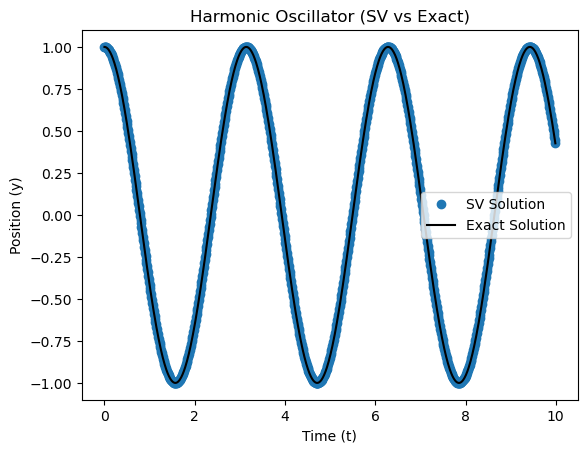

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Störmer-Verlet method
def stormer_verlet(f, y0, v0, t, dt):
    """
    Implements the Störmer-Verlet method.

    Parameters:
    - f: function f(y, t), the force or acceleration.
    - y0: initial position.
    - v0: initial velocity.
    - t: array of time points.
    - dt: time step size.

    Returns:
    - y: array of positions.
    - v: array of velocities.
    """
    n_steps = len(t)
    y = np.zeros(n_steps)
    v = np.zeros(n_steps)
    
    # Initial conditions
    y[0] = y0
    v[0] = v0
    
    # First step to initialize y[1] using explicit Euler (required for SV method)
    y[1] = y0 + dt * v0 + 0.5 * dt**2 * f(y0, t[0])
    
    # Loop through time steps
    for n in range(1, n_steps - 1):
        # Störmer-Verlet position update
        y[n+1] = 2 * y[n] - y[n-1] + dt**2 * f(y[n], t[n])
        # Velocity update (central difference)
        v[n] = (y[n+1] - y[n-1]) / (2 * dt)
    
    # Estimate final velocity
    v[-1] = (y[-1] - y[-2]) / dt
    
    return y, v

# Define problems to solve
# 1. Harmonic Oscillator: y'' + omega^2 y = 0 (f = -omega^2 * y)
omega = 2.0
f_ho = lambda y, t: -omega**2 * y
y0_ho, v0_ho = 1.0, 0.0

# 2. Gravitational motion: y'' = -g (f = -g)
g = 9.8
f_grav = lambda y, t: -g
y0_grav, v0_grav = 10.0, 0.0

# Time parameters
dt = 0.01
t = np.arange(0, 10, dt)

# Solve the problems using SV method
y_ho, v_ho = stormer_verlet(f_ho, y0_ho, v0_ho, t, dt)
y_grav, v_grav = stormer_verlet(f_grav, y0_grav, v0_grav, t, dt)

# Analytical solutions for comparison
y_ho_exact = y0_ho * np.cos(omega * t)
y_grav_exact = y0_grav + v0_grav * t - 0.5 * g * t**2

# Plot results

# Harmonic Oscillator
# plt.subplot(1, 2, 1)
plt.plot(t, y_ho, "o", label='SV Solution')
plt.plot(t, y_ho_exact, "k", label='Exact Solution' )
plt.title('Harmonic Oscillator (SV vs Exact)')
plt.xlabel('Time (t)')
plt.ylabel('Position (y)')
plt.legend()




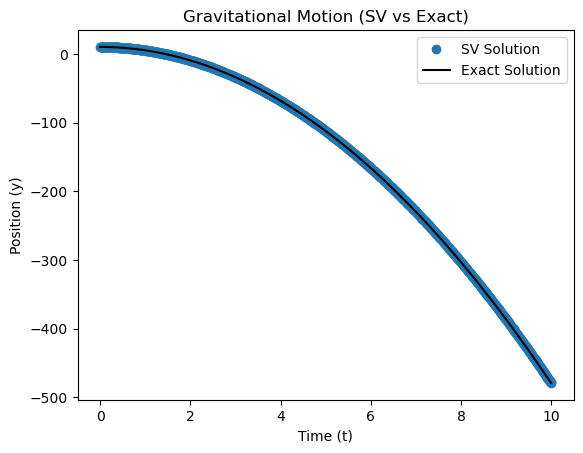

In [14]:
# Gravitational motion
# plt.subplot(1, 2, 2)
plt.plot(t, y_grav, "o", label='SV Solution')
plt.plot(t, y_grav_exact, "k" ,label='Exact Solution')
plt.title('Gravitational Motion (SV vs Exact)')
plt.xlabel('Time (t)')
plt.ylabel('Position (y)')
plt.legend()

# plt.tight_layout()
# plt.show()